In [1]:
import sys
sys.path.insert(0, '../scripts')

import direction_transition as dit
import paths
from preprocessing import read_csv_clean
from intervals import mean_pellet_collect_time

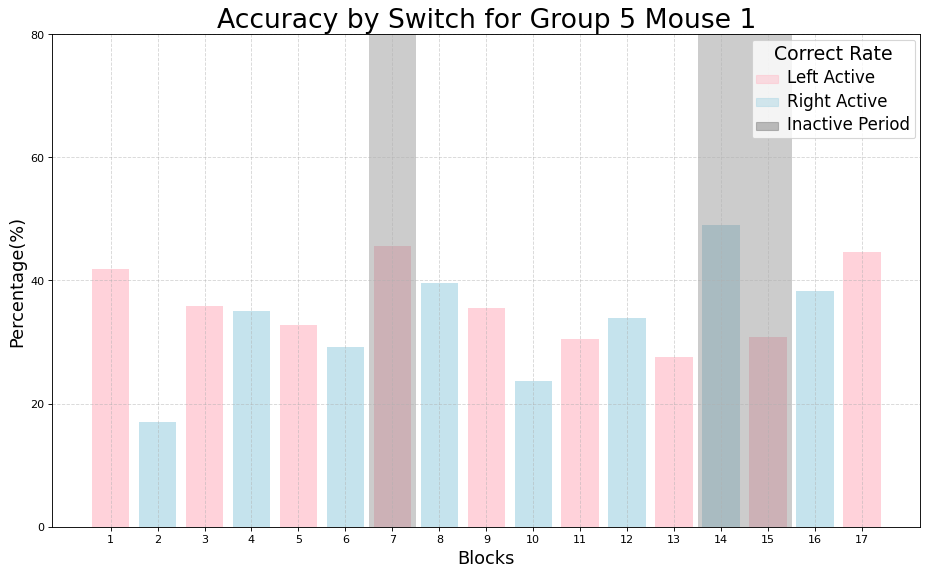

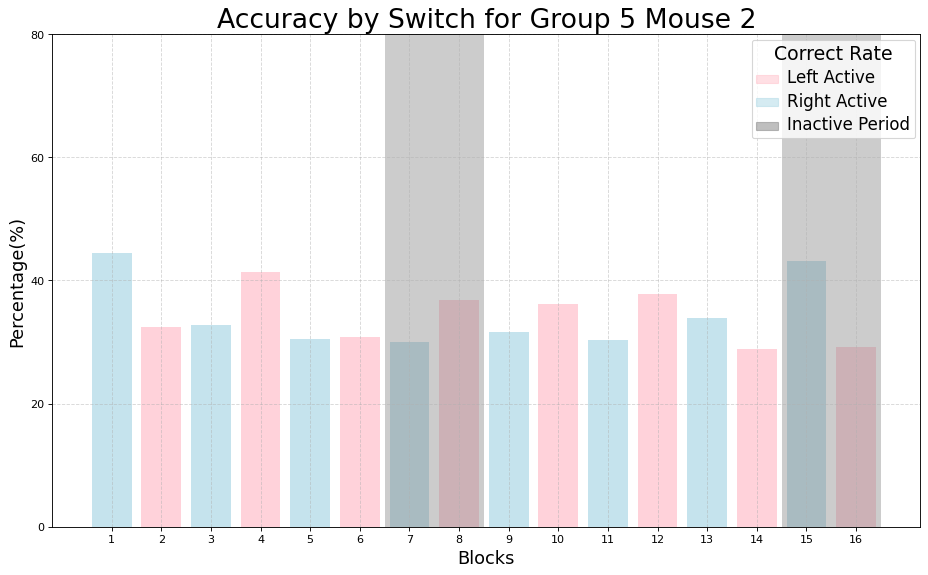

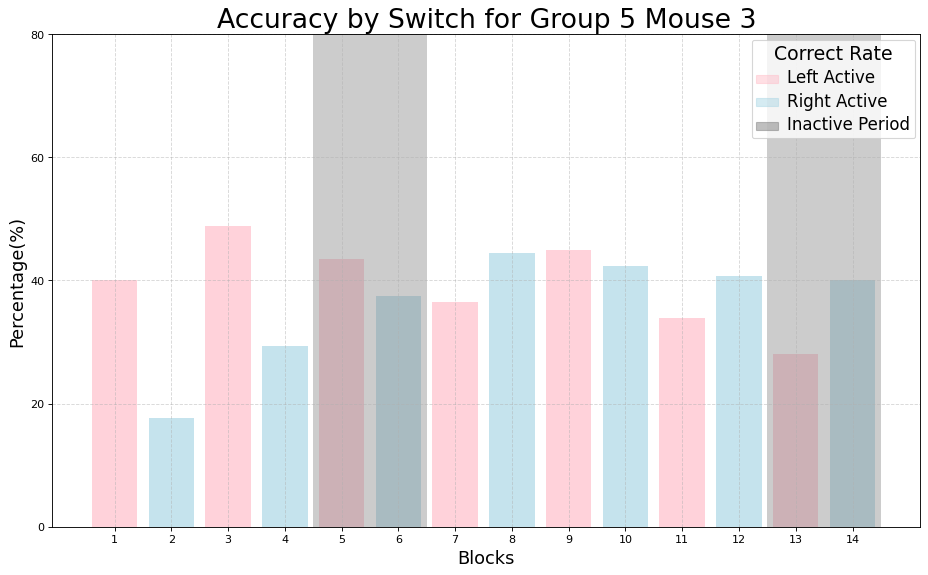

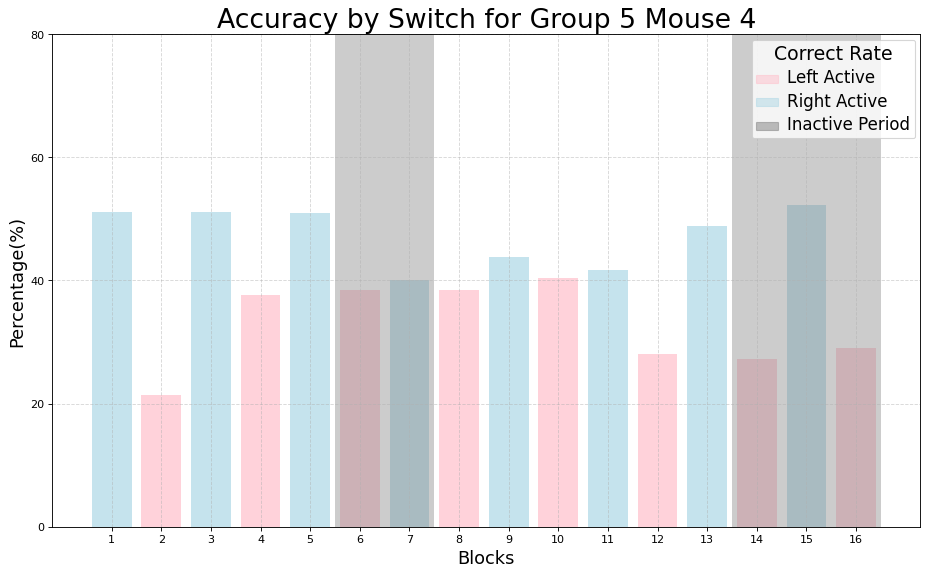

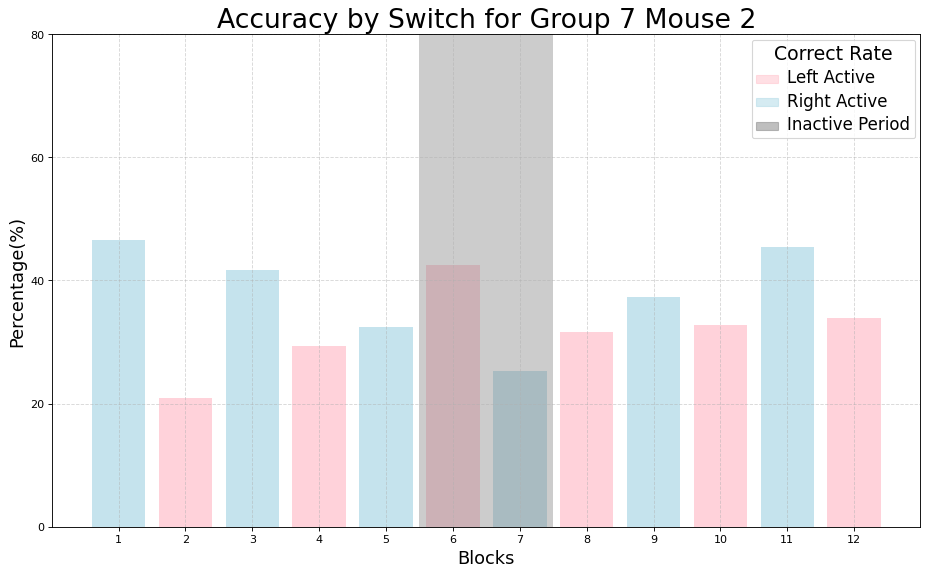

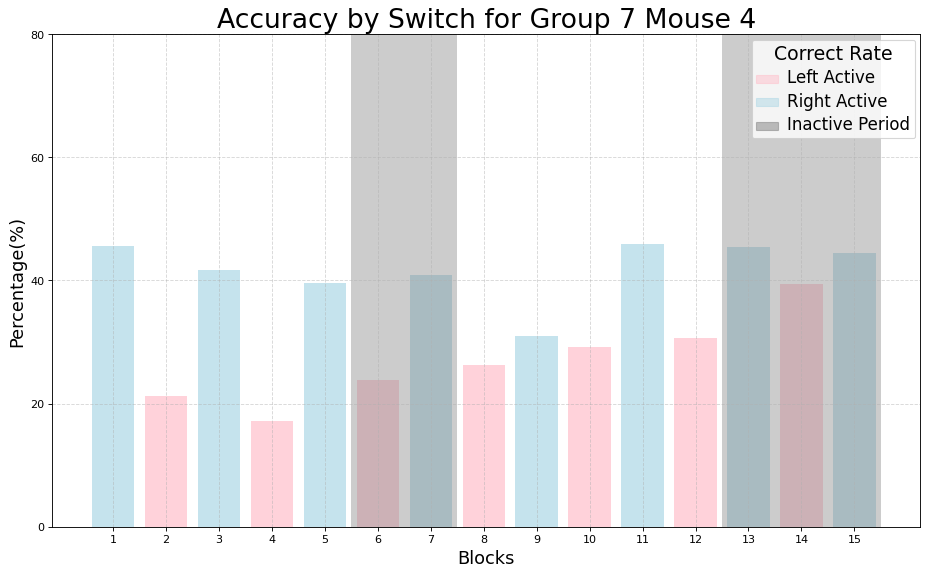

In [2]:
action_prop = 0.8
block_prop = 0.6

ctrl_scores = []

for path in paths.contigency_flip_ctrl:
    data_dropped = read_csv_clean(path, remove_trivial=False)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_learning_trend(data_stats, blocks, path, block_prop=block_prop, action_prop=action_prop)
    ctrl_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

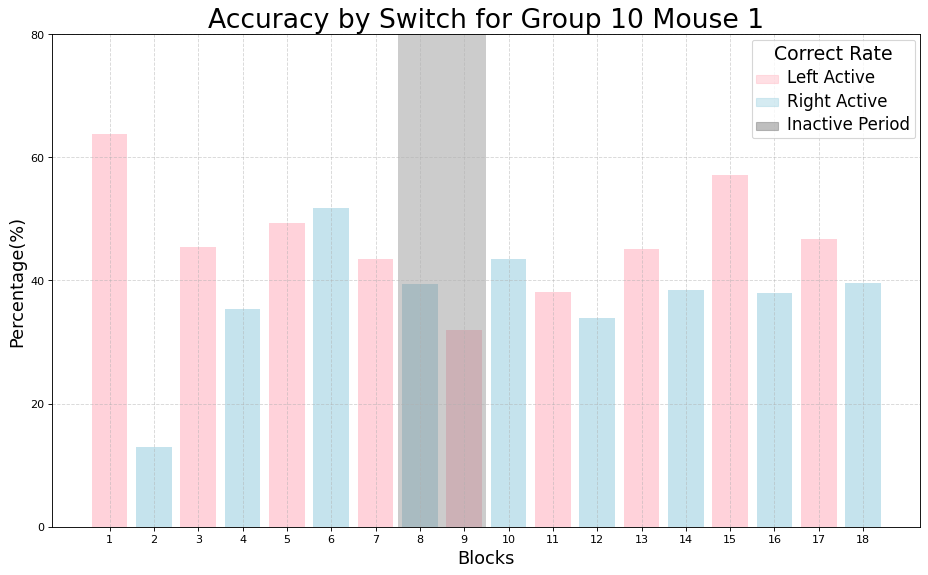

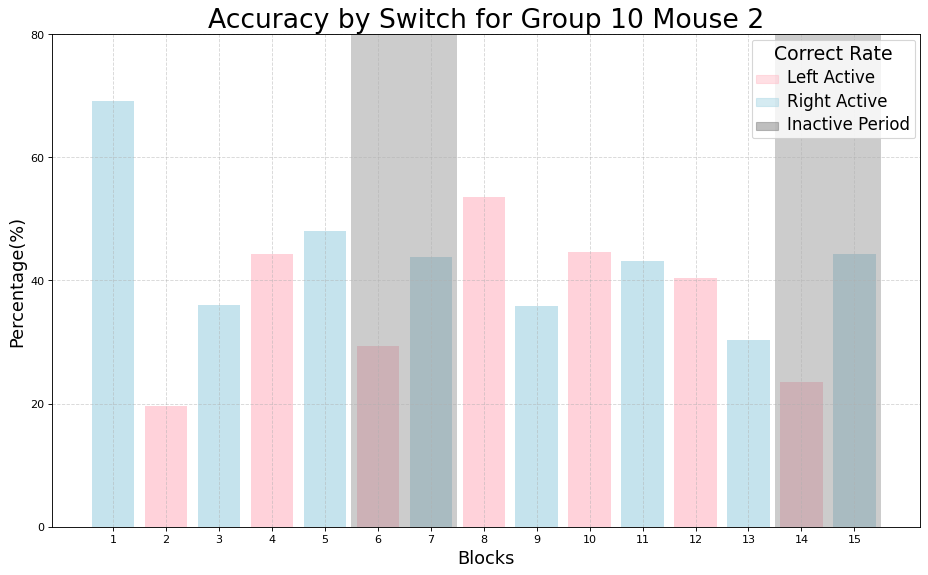

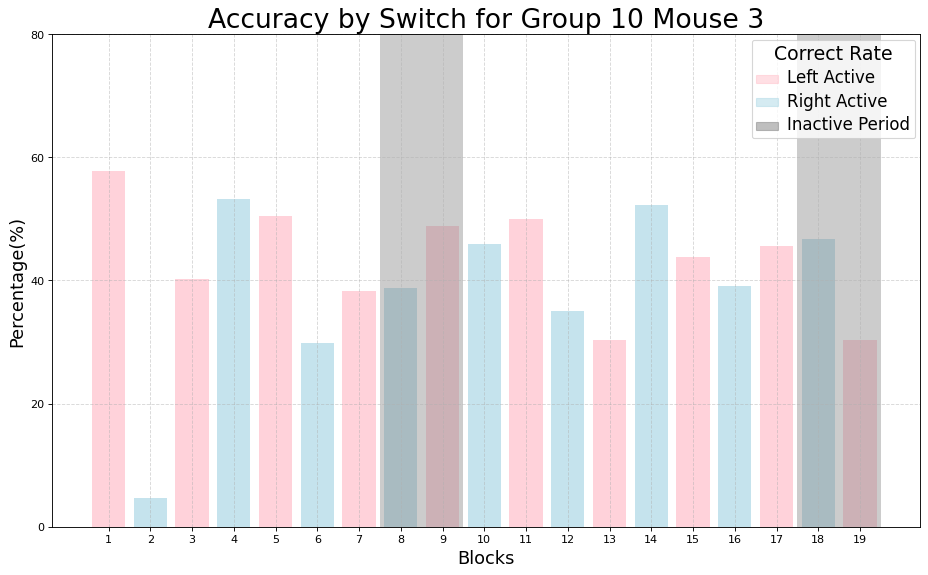

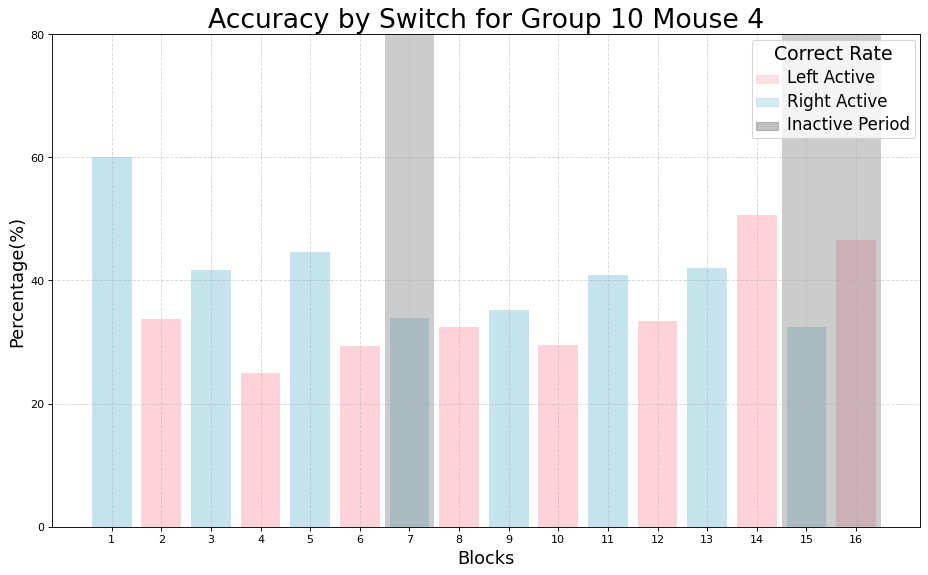

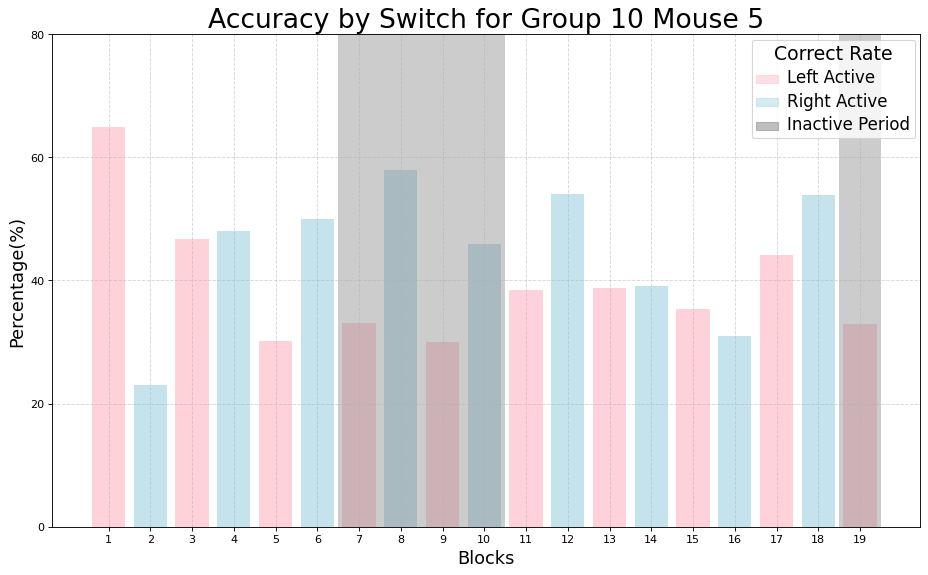

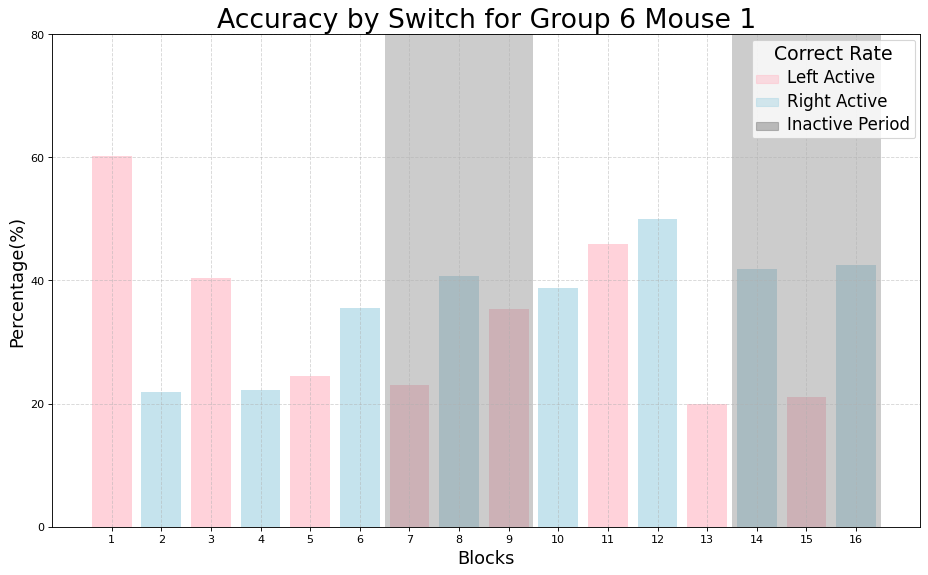

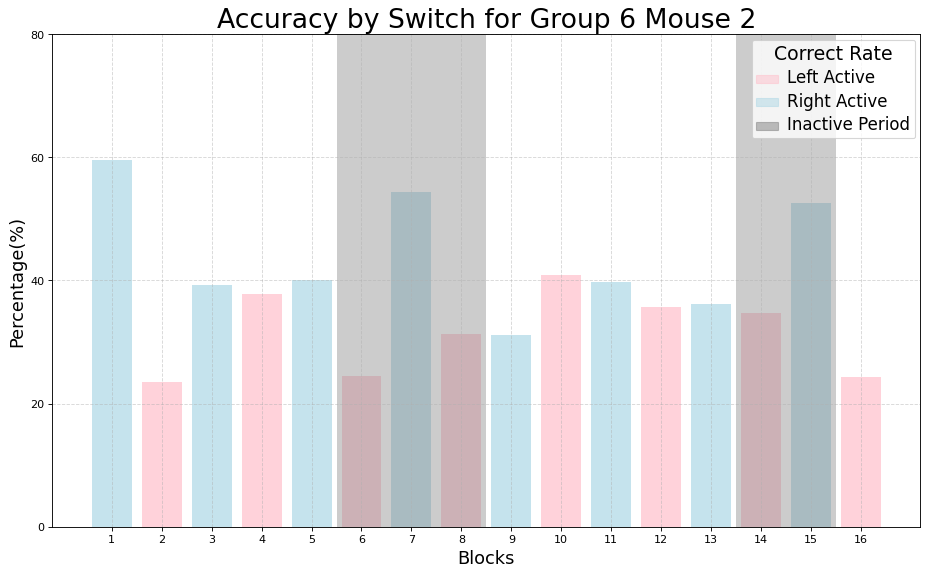

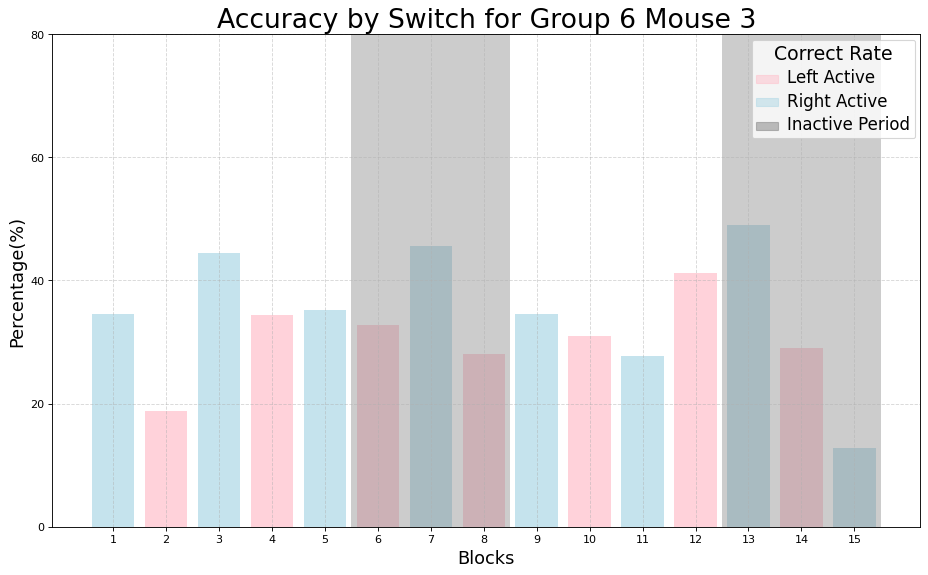

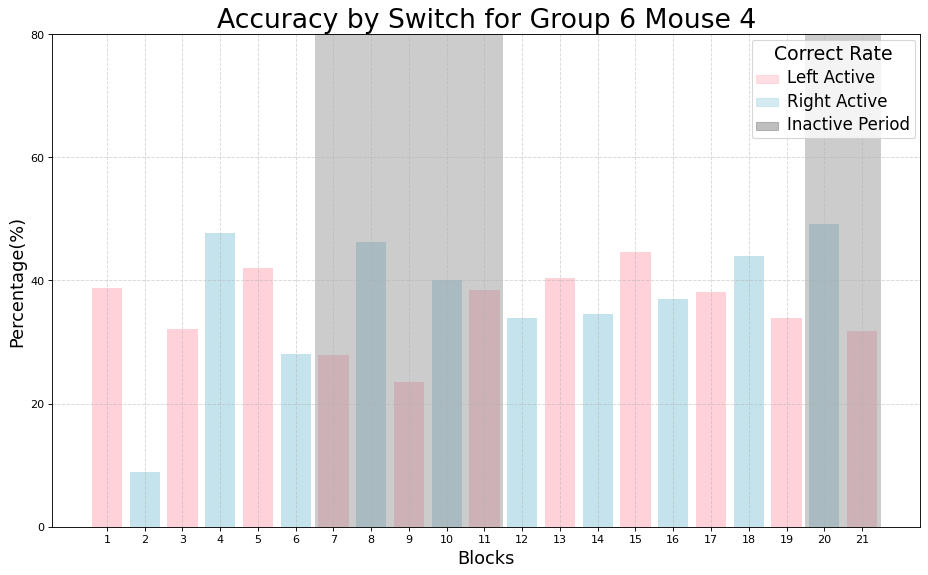

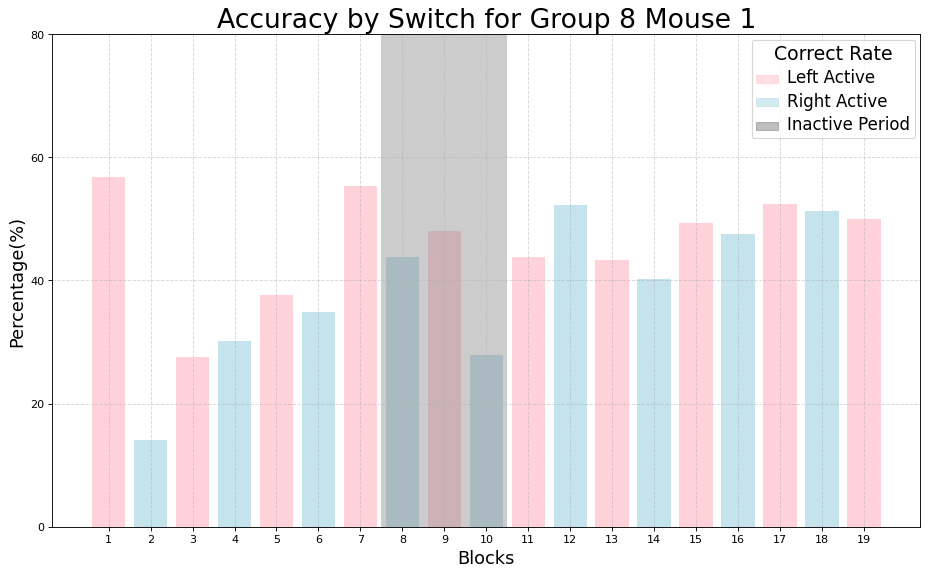

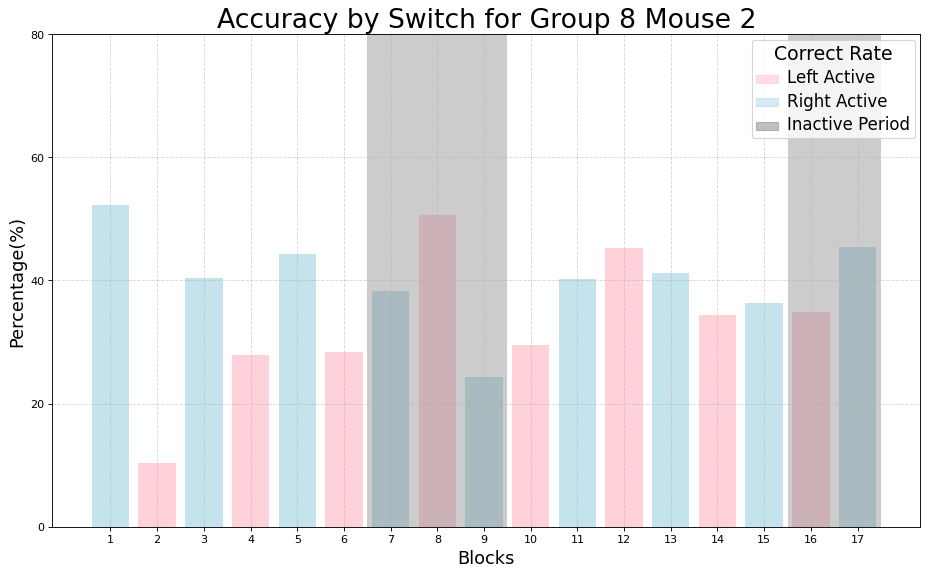

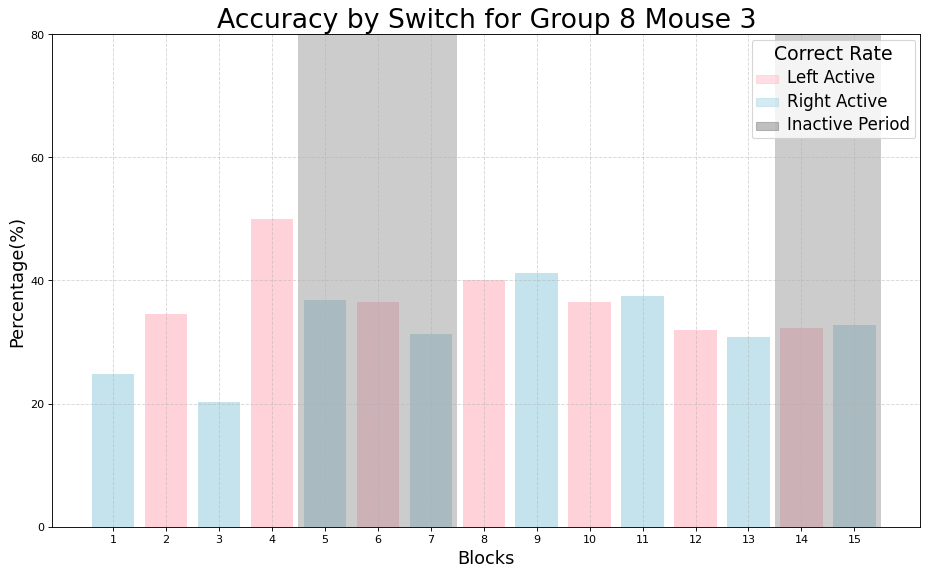

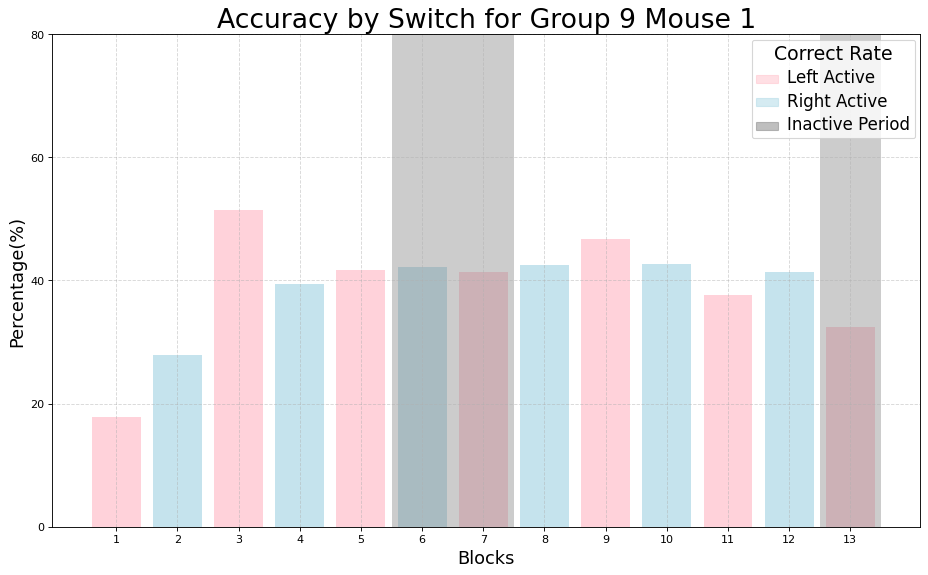

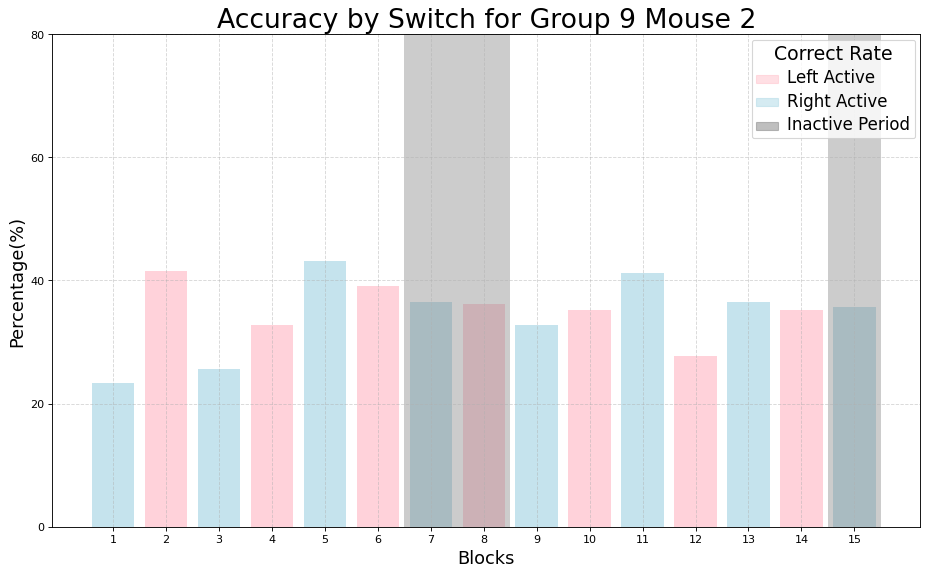

In [3]:
cask_scores = []

for path in paths.contigency_flip_cask:
    data_dropped = read_csv_clean(path, remove_trivial=False)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_learning_trend(data_stats, blocks, path, block_prop=block_prop, action_prop=action_prop)
    cask_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

In [4]:
import intervals as invs

invs.perform_T_test(ctrl_scores, cask_scores, test_side='greater')

P Value is  0.04518341469030594
Experiment group is significantly greater than control group


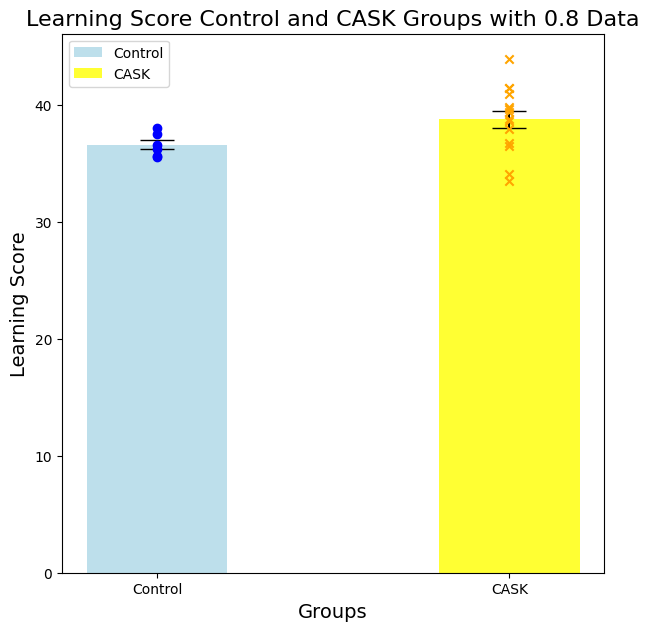

In [5]:
dit.graph_learning_score(ctrl_scores, cask_scores, exp_group_name='CASK', proportion=action_prop)

### Pellet Collect Time

In [6]:
ctrl_all_times = []
ctrl_means = []
ctrl_stds = []

for file in paths.contigency_flip_ctrl:
    times, mean, std = mean_pellet_collect_time(file, remove_outlier=True, n_stds=5)
    ctrl_all_times.append(times)
    ctrl_means.append(mean)
    ctrl_stds.append(std)

In [7]:
cask_all_times = []
cask_means = []
cask_stds = []

for file in paths.contigency_flip_cask:
    times, mean, std = mean_pellet_collect_time(file, remove_outlier=True, n_stds=5)
    cask_all_times.append(times)
    cask_means.append(mean)
    cask_stds.append(std)

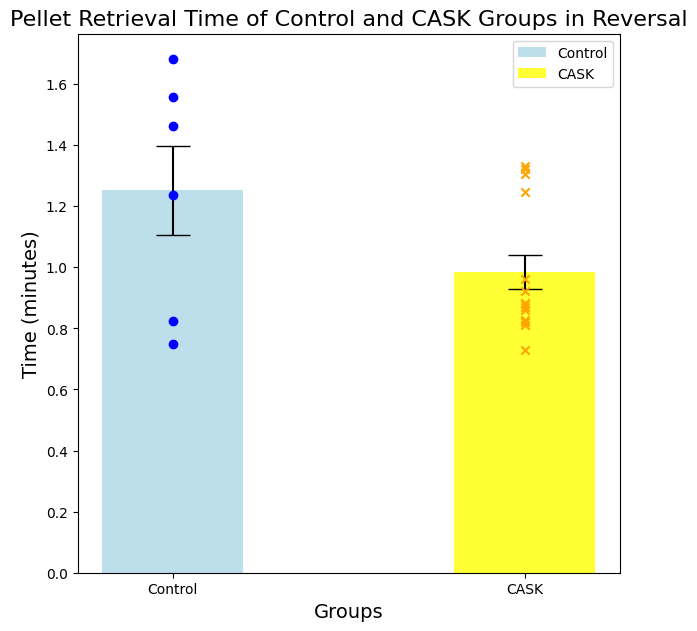

In [8]:
dit.graph_retrieval_time(ctrl_means, cask_means, exp_group_name='CASK')

In [9]:
import intervals as invs

invs.perform_T_test(ctrl_means, cask_means, test_side='less')

P Value is  0.030561299202965856
Experiment group is significantly less than control group


In [10]:
invs.perform_T_test(ctrl_stds, cask_stds, test_side='less')

P Value is  0.04411710979883084
Experiment group is significantly less than control group
